In [2]:

from lib.Environment_refactored import DeepTradingEnvironment, DeepAgentPytorch
import datetime
import numpy as np


out_reward_window=datetime.timedelta(days=7)
# parameters related to the transformation of data, this parameters govern an step before the algorithm
meta_parameters = {"in_bars_count": 30,
                   "out_reward_window":out_reward_window ,
                   "state_type":"in_window_out_window",
                   "asset_names":["asset_1","asset_2"]}

# parameters that are related to the objective/reward function construction
objective_parameters = {"percent_commission": .001,
                        }
print("===Meta Parameters===")
print(meta_parameters)
print("===Objective Parameters===")
print(objective_parameters)


assets_simulation_details={"asset_1":{"method":"GBM","sigma":.01,"mean":.02},
                    "asset_2":{"method":"GBM","sigma":.03,"mean":.18}}

env=DeepTradingEnvironment.build_environment_from_simulated_assets(assets_simulation_details=assets_simulation_details,
                                                                     data_hash="simulation_gbm",
                                                                     meta_parameters=meta_parameters,
                                                                     objective_parameters=objective_parameters)

# env=DeepTradingEnvironment.build_environment_from_dirs_and_transform(
#                                                                      data_hash="test_dirs",
#                                                                      meta_parameters=meta_parameters,
#                                                                      objective_parameters=objective_parameters)

#reward_function= "cum_return" , "max_sharpe"

cov=np.array([[assets_simulation_details["asset_1"]["sigma"]**2,0],[0,assets_simulation_details["asset_2"]["sigma"]**2]])
mus=np.array([assets_simulation_details["asset_1"]["mean"],assets_simulation_details["asset_2"]["mean"]])

from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt.plotting import plot_efficient_frontier
from pypfopt.cla import CLA
ef = EfficientFrontier(mus, cov)
# weights = ef.max_sharpe(risk_free_rate=0)
weights = ef.min_volatility()

x=np.array(list(weights.values())).reshape(-1,1)
p_vol=np.sqrt(np.matmul(np.matmul(x.T,cov),x))
p_sharpe=np.matmul(x.T,mus)/p_vol

deep_agent=DeepAgentPytorch(environment=env,out_reward_window_td=out_reward_window,pre_sample=True,
                         reward_function="cum_return",sample_observations=64)


deep_agent.set_plot_weights(weights=np.array([0,1]), benchmark_G=assets_simulation_details["asset_2"]["mean"])
# deep_agent.set_plot_weights(weights=np.array(list(weights.values())),
#                               benchmark_G=-p_vol.ravel()[0])


# linear_agent=LinearAgent(environment=env,out_reward_window_td=out_reward_window,
#                          reward_function="min_vol",sample_observations=32)

# cla=CLA(mus,cov)
# weights=cla.max_sharpe()
#max return all weights should go to asset with higher mean
# linear_agent.set_plot_weights(weights=np.array([0,1]), benchmark_G=assets_simulation_details["asset_2"]["mean"])

#min vol weithts


#
# linear_agent.set_plot_weights(weights=np.array(list(weights.values())),
#                               benchmark_G=-p_vol.ravel()[0])
#
# # linear_agent.set_plot_weights(weights=np.array(list(weights.values())),
# #                               benchmark_G=p_sharpe.ravel()[0])
#
# linear_agent.REINFORCE_fit(add_baseline=True,plot_gradients=True)
# # linear_agent.REINFORCE_refactor_fid()
#
#



===Meta Parameters===
{'in_bars_count': 30, 'out_reward_window': datetime.timedelta(days=7), 'state_type': 'in_window_out_window', 'asset_names': ['asset_1', 'asset_2']}
===Objective Parameters===
{'percent_commission': 0.001}


pre-sampling indices: 100%|████████████████████████████████████████████████████████| 1149/1149 [00:17<00:00, 65.58it/s]


In [3]:

# x=np.array(list(weights.values())).reshape(-1,1)
# p_vol=np.sqrt(np.matmul(np.matmul(x.T,cov),x))
# p_sharpe=np.matmul(x.T,mus)/p_vol

# deep_agent=DeepAgentPytorch(environment=env,out_reward_window_td=out_reward_window,pre_sample=True,
#                          reward_function="cum_return",sample_observations=64)

# deep_agent.set_plot_weights(weights=np.array([0,1]), benchmark_G=assets_simulation_details["asset_2"]["mean"])
# # deep_agent.set_plot_weights(weights=np.array(list(weights.values())),
# #                               benchmark_G=-p_vol.ravel()[0])



# # linear_agent=LinearAgent(environment=env,out_reward_window_td=out_reward_window,
# #                          reward_function="cum_return",sample_observations=32)
# # linear_agent.set_plot_weights(weights=np.array(list(weights.values())),
# #                               benchmark_G=-p_vol.ravel()[0])

  0%|                                                                                        | 0/10000 [00:00<?, ?it/s]C:\Users\micha\OneDrive\Documents\CSCI E-599a Data Science Capstone\capstone\lib\Environment_refactored.py:1201: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  mus_clip=torch.nn.Softmax()(self.mus(x))
loss tensor(-0.0434, grad_fn=<AddBackward0>):   2%|▋                               | 200/10000 [01:02<39:13,  4.16it/s]

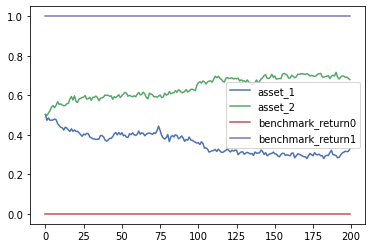

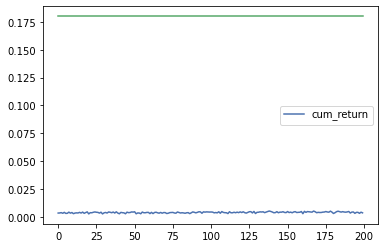

C:\Users\micha\OneDrive\Documents\CSCI E-599a Data Science Capstone\capstone\lib\Environment_refactored.py:1201: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  mus_clip=torch.nn.Softmax()(self.mus(x))
loss tensor(-0.0230, grad_fn=<AddBackward0>):   4%|█▎                              | 400/10000 [01:53<48:00,  3.33it/s]

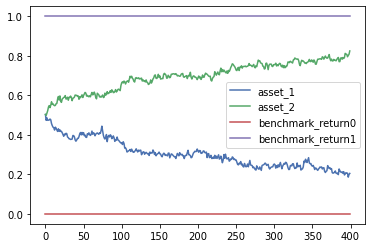

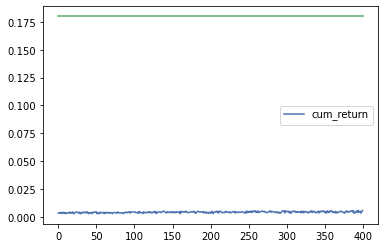

C:\Users\micha\OneDrive\Documents\CSCI E-599a Data Science Capstone\capstone\lib\Environment_refactored.py:1201: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  mus_clip=torch.nn.Softmax()(self.mus(x))
loss tensor(-0.0553, grad_fn=<AddBackward0>):   6%|█▉                              | 600/10000 [02:57<41:17,  3.79it/s]

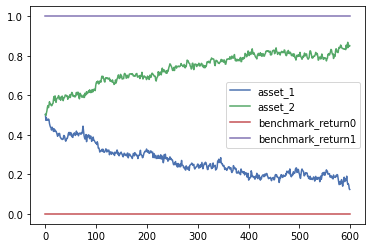

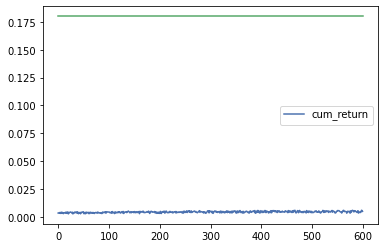

C:\Users\micha\OneDrive\Documents\CSCI E-599a Data Science Capstone\capstone\lib\Environment_refactored.py:1201: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  mus_clip=torch.nn.Softmax()(self.mus(x))
loss tensor(-0.0396, grad_fn=<AddBackward0>):   8%|██▌                             | 800/10000 [03:50<39:23,  3.89it/s]

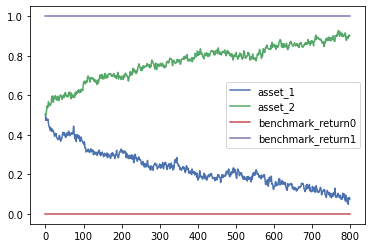

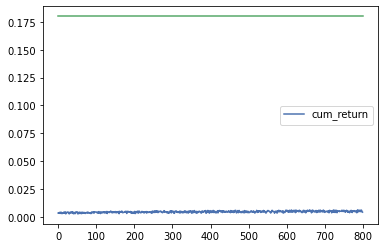

C:\Users\micha\OneDrive\Documents\CSCI E-599a Data Science Capstone\capstone\lib\Environment_refactored.py:1201: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  mus_clip=torch.nn.Softmax()(self.mus(x))
loss tensor(-0.0398, grad_fn=<AddBackward0>):  10%|███                            | 1000/10000 [04:42<37:49,  3.97it/s]

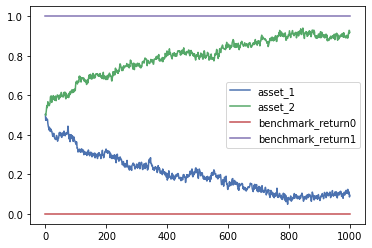

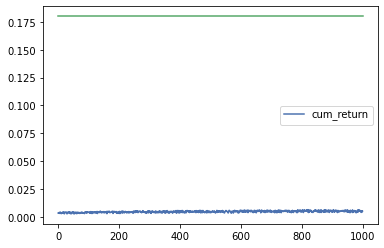

C:\Users\micha\OneDrive\Documents\CSCI E-599a Data Science Capstone\capstone\lib\Environment_refactored.py:1201: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  mus_clip=torch.nn.Softmax()(self.mus(x))
loss tensor(-0.0008, grad_fn=<AddBackward0>):  12%|███▋                           | 1200/10000 [05:32<35:05,  4.18it/s]

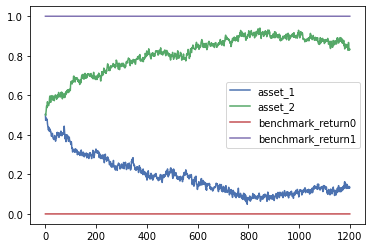

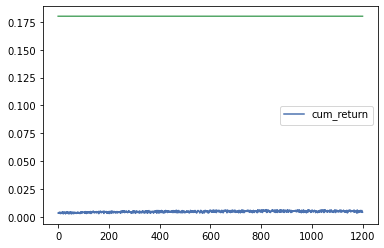

C:\Users\micha\OneDrive\Documents\CSCI E-599a Data Science Capstone\capstone\lib\Environment_refactored.py:1201: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  mus_clip=torch.nn.Softmax()(self.mus(x))
loss tensor(-0.0364, grad_fn=<AddBackward0>):  14%|████▎                          | 1400/10000 [06:43<58:17,  2.46it/s]

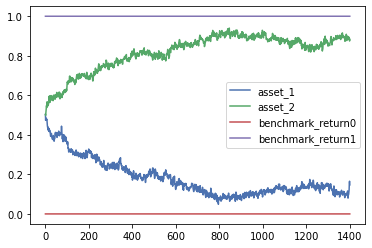

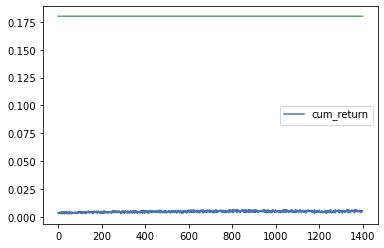

C:\Users\micha\OneDrive\Documents\CSCI E-599a Data Science Capstone\capstone\lib\Environment_refactored.py:1201: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  mus_clip=torch.nn.Softmax()(self.mus(x))
loss tensor(-0.0402, grad_fn=<AddBackward0>):  16%|████▉                          | 1600/10000 [07:42<48:50,  2.87it/s]

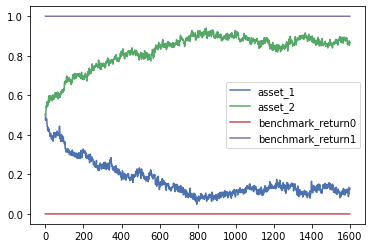

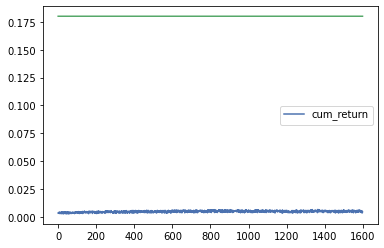

C:\Users\micha\OneDrive\Documents\CSCI E-599a Data Science Capstone\capstone\lib\Environment_refactored.py:1201: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  mus_clip=torch.nn.Softmax()(self.mus(x))
loss tensor(-0.0489, grad_fn=<AddBackward0>):  18%|█████▌                         | 1800/10000 [08:43<32:59,  4.14it/s]

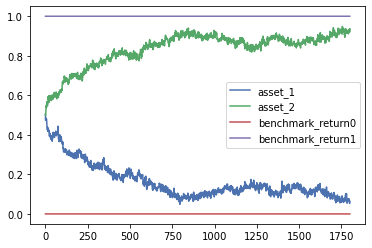

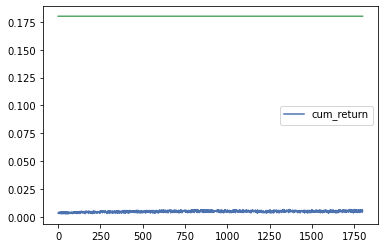

C:\Users\micha\OneDrive\Documents\CSCI E-599a Data Science Capstone\capstone\lib\Environment_refactored.py:1201: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  mus_clip=torch.nn.Softmax()(self.mus(x))
loss tensor(-0.0276, grad_fn=<AddBackward0>):  20%|██████▏                        | 2000/10000 [09:33<31:07,  4.28it/s]

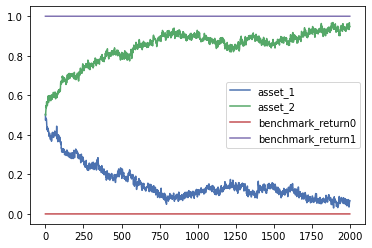

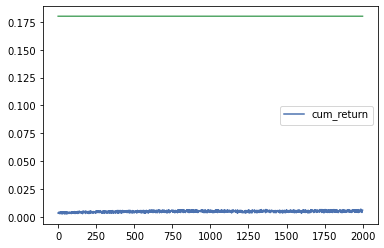

C:\Users\micha\OneDrive\Documents\CSCI E-599a Data Science Capstone\capstone\lib\Environment_refactored.py:1201: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  mus_clip=torch.nn.Softmax()(self.mus(x))
loss tensor(0.0028, grad_fn=<AddBackward0>):  22%|███████                         | 2200/10000 [10:23<30:13,  4.30it/s]

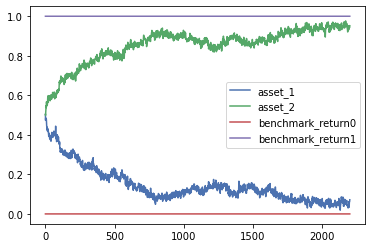

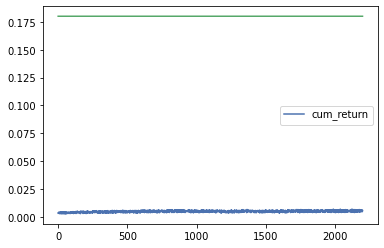

C:\Users\micha\OneDrive\Documents\CSCI E-599a Data Science Capstone\capstone\lib\Environment_refactored.py:1201: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  mus_clip=torch.nn.Softmax()(self.mus(x))
loss tensor(-0.0284, grad_fn=<AddBackward0>):  24%|███████▍                       | 2400/10000 [11:24<41:18,  3.07it/s]

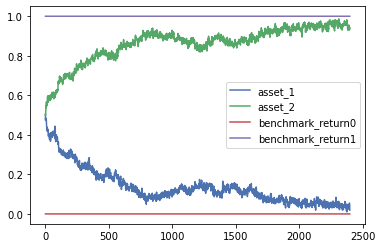

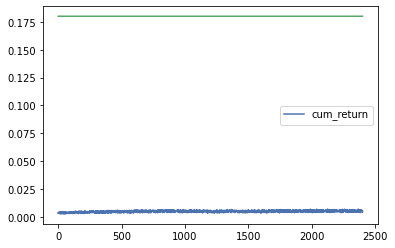

C:\Users\micha\OneDrive\Documents\CSCI E-599a Data Science Capstone\capstone\lib\Environment_refactored.py:1201: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  mus_clip=torch.nn.Softmax()(self.mus(x))
loss tensor(-0.0251, grad_fn=<AddBackward0>):  26%|████████                       | 2600/10000 [12:24<36:29,  3.38it/s]

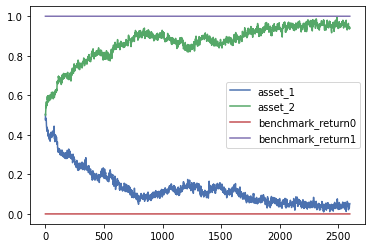

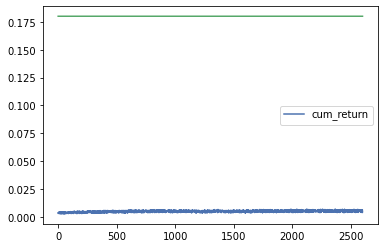

C:\Users\micha\OneDrive\Documents\CSCI E-599a Data Science Capstone\capstone\lib\Environment_refactored.py:1201: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  mus_clip=torch.nn.Softmax()(self.mus(x))
loss tensor(-0.0179, grad_fn=<AddBackward0>):  28%|████████▋                      | 2800/10000 [13:33<44:32,  2.69it/s]

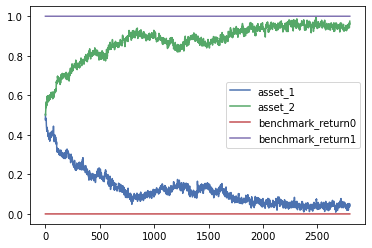

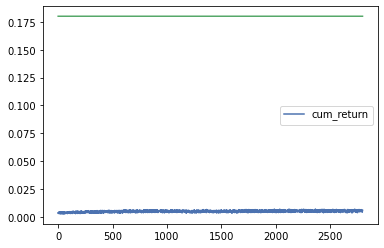

C:\Users\micha\OneDrive\Documents\CSCI E-599a Data Science Capstone\capstone\lib\Environment_refactored.py:1201: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  mus_clip=torch.nn.Softmax()(self.mus(x))
loss tensor(-0.0075, grad_fn=<AddBackward0>):  30%|█████████▏                     | 2961/10000 [14:25<34:47,  3.37it/s]

In [ ]:
deep_agent.REINFORCE_baseline_fit()

# linear_agent.REINFORCE_baseline_fit()